In [7]:
import pickle
import numpy as np
from os import walk
import matplotlib.pyplot as plt

In [42]:
def plot_graph(paths, arch_names, start_seeds, end_seeds, image_name, title):
    training_losses = {}
#     with open("/home/madhusudhan/ms-cub/courses/CSCI-5622-ML/ml-project-nnRNN/nnRNN_release/saves/sMNIST-paper-params/sMNIST/LSTM/madhu.pkl", 'rb') as handle:                        
#         losses_lstm = pickle.load(handle)
#         training_losses["LSTM"].append(losses)
#     print(losses_lstm["train_acc"])

#     line_colors = ["#663300", "#33cc33","#ff0000", "#660066","#66a3ff"]
#     shade_colors = [ "#ffcc99","#c2f0c2","#ff9999", "#ffccff", "#b3d1ff"]

    line_colors = ['#3B85BC', '#D6352F','#9367BD', '#8B564A']
    shade_colors = ['#c6ddec','#f7d4d5', '#e6dcef', '#e1d3d0']
    
    for idx,path1 in enumerate(paths):
        random_seeds = np.arange(start_seeds[idx],end_seeds[idx])
        training_losses[arch_names[idx]] = []
        path=""
        for seed in random_seeds:
            path = path1+"/"+str(seed)
            for (dirpath, dirnames, filenames) in walk(path):
                for file in filenames:
                    if file.endswith("RNN_Train_Accuracy") or file.endswith("LSTM_Train_Accuracy"):                    
                        with open(path+"/"+file, 'rb') as handle:                        
                            losses = pickle.load(handle)
                            if "train_loss" in losses:
                                losses = losses["train_loss"]
#                             print(arch_names[idx],";", losses)
                            training_losses[arch_names[idx]].append(losses[:70])

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
    min_losses = {}

#     print(training_losses["LSTM"])
    for idx, arch_name in enumerate(arch_names):
        training_losses_np = np.array(training_losses[arch_name])
        print("\n",arch_name, "\nMin loss for 6 evaluation runs: ", np.amin(training_losses_np, axis=1))
        means = np.mean(training_losses_np, axis=0)
        std_errors = np.std(training_losses_np, axis=0)/np.sqrt(10*training_losses_np.shape[1])
        start_std_error = means+std_errors
        end_std_error = means-std_errors
        plt.plot(np.arange(1,71),means,color=line_colors[idx],label=arch_name)
        plt.fill_between(np.arange(1,71),start_std_error,end_std_error, color=shade_colors[idx])
#     plt.plot(np.arange(1,71),losses_lstm["train_acc"][:70],color=line_colors[-1],label="LSTM")
        
    ax.legend(fontsize='xx-large')
    plt.title(title, fontsize=15)
    plt.xlabel("Iterations", fontsize=20)
    plt.ylabel("Accuracy", fontsize=20)
    ax.set(ylim=(0, 1))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15) 
        
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15) 

    plt.savefig("./images/"+image_name)
    plt.show()
    
    
#     ax.legend()
#     plt.title("sMNIST for T=70")
#     plt.xlabel("Iterations")
#     plt.ylabel("Training accuracy")
#     ax.set(ylim=(0, 1))
    
#     plt.savefig("./images/"+image_name)
#     plt.show()


 RNN 
Min loss for 6 evaluation runs:  [0.08183761]

 expRNN 
Min loss for 6 evaluation runs:  [0.73268593]

 nnRNN 
Min loss for 6 evaluation runs:  [0.633575]

 LSTM 
Min loss for 6 evaluation runs:  [0.12310394]


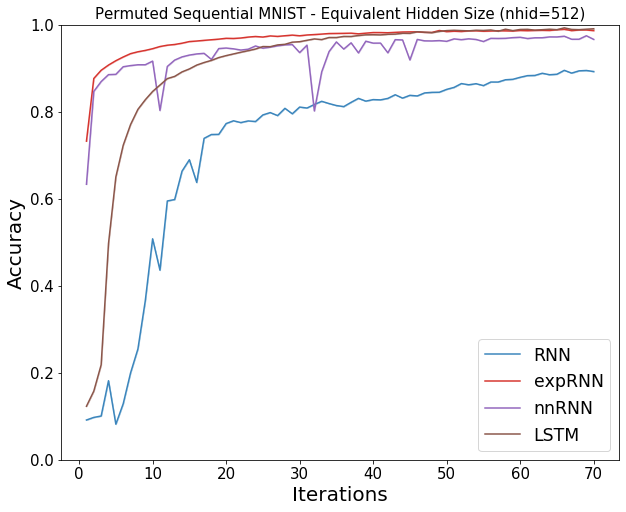

In [43]:
arch_names = ["RNN",  "expRNN", "nnRNN","LSTM"]
start_seeds = [100, 100,100,100]
# end_seeds = [103,103,103,103]
end_seeds = [101,101,101,101]
paths = ['./saves/sMNIST-paper-params/sMNIST/RNN', 
         './saves/sMNIST-paper-params/sMNIST/expRNN',
         './saves/sMNIST-paper-params/sMNIST/nnRNN',
        './saves/sMNIST-paper-params/sMNIST/LSTM']
plot_graph(paths, arch_names, start_seeds, end_seeds, "sMNIST-all-rnns","Permuted Sequential MNIST - Equivalent Hidden Size (nhid=512)")

AxisError: axis 1 is out of bounds for array of dimension 1

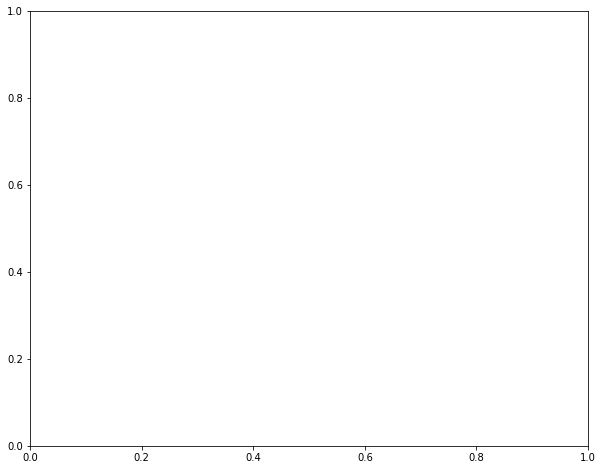

In [37]:
arch_names = ["RNN",  "expRNN", "nnRNN"]
start_seeds = [500, 500,500]
end_seeds = [501,501,501]
paths = ['./saves/sMNIST-paper-params/sMNIST/RNN', './saves/sMNIST-paper-params/sMNIST/expRNN',
         './saves/sMNIST-paper-params/sMNIST/nnRNN']
plot_graph(paths, arch_names, start_seeds, end_seeds, "sMNIST-all-rnns","Permuted Sequential MNIST - Equivalent Hidden Size (nhid=512)")